In [54]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv(r"/content/drive/MyDrive/Dataset/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [58]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

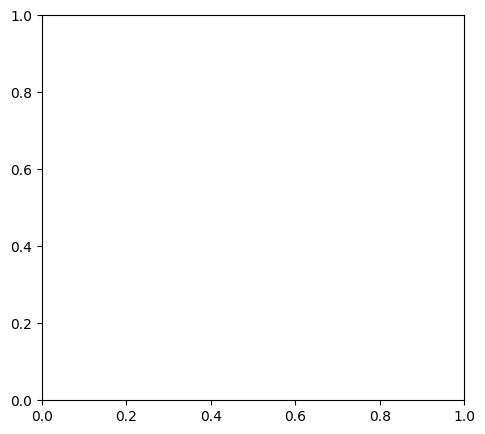

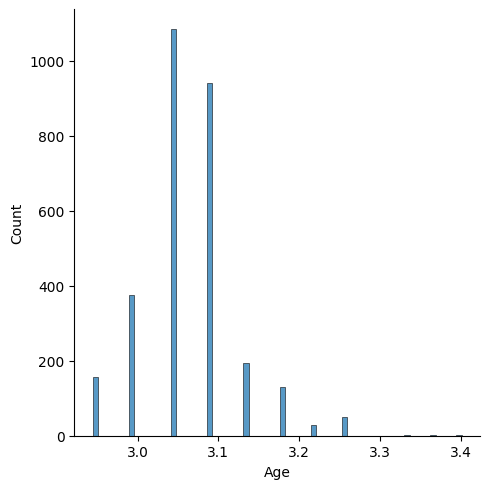

In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.displot(feature)
transformationplot(np.log(df['Age']))

In [59]:
df = df.replace(['Male'], [0]) 
df = df.replace(['Female'], [1])

df = df.replace(['Computer Science', 'Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],
                [0,1,2,3,4,5])

In [ ]:
df = df.drop(['Hostel'], axis=1)

df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


<ipython-input-9-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

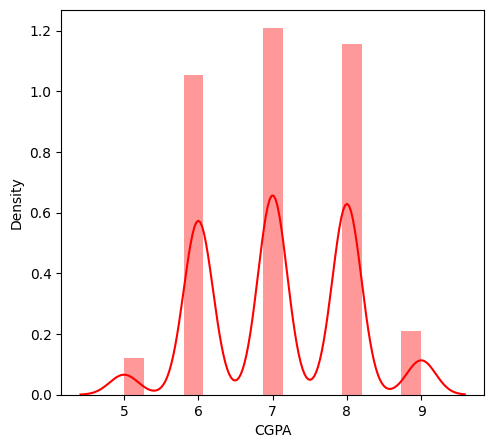

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

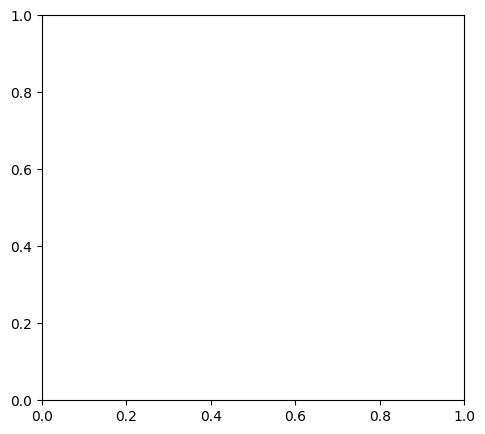

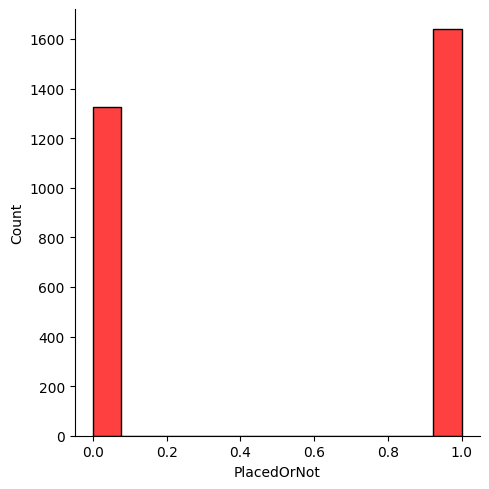

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.displot(df['PlacedOrNot'],color='r')

In [60]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.165543,1.932569,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.682618,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,2.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,0.000000,3.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].value_counts()

0    2475
1     491
Name: Gender, dtype: int64

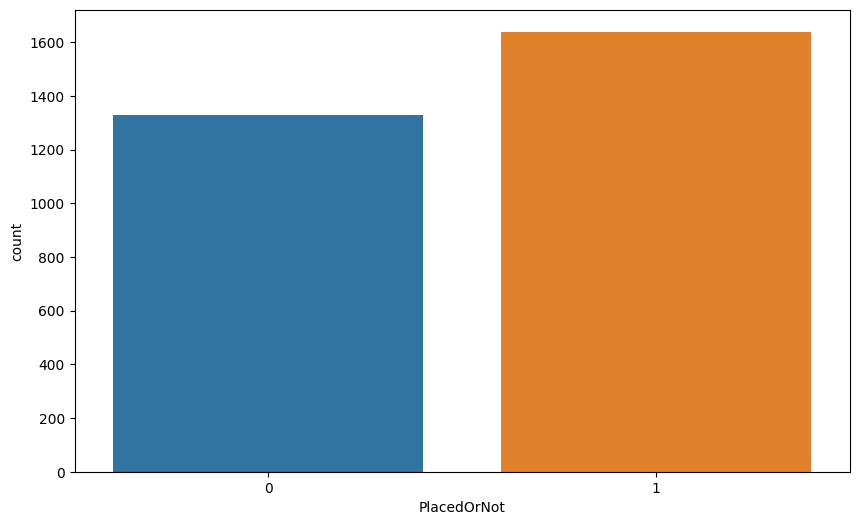

In [62]:
plt.figure(figsize = (10,6), dpi = 100)
color_palette = sns.color_palette("BuGn_r")
sns.countplot(x = "PlacedOrNot", data = df)
plt.show()

In [63]:
df['Stream'].value_counts()

0    776
1    691
2    424
3    424
4    334
5    317
Name: Stream, dtype: int64

In [64]:
X = df.drop(columns = 'PlacedOrNot', axis=1)
Y = df['PlacedOrNot']

In [65]:
import joblib
joblib.dump(X,'Placement')


['Placement']

In [66]:
print(X)


      Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs
0      22       0       2            1     8       1                  1
1      21       1       0            0     7       1                  1
2      22       1       1            1     6       0                  0
3      21       0       1            0     8       0                  1
4      22       0       3            0     8       1                  0
...   ...     ...     ...          ...   ...     ...                ...
2961   23       0       1            0     7       0                  0
2962   23       0       3            1     7       1                  0
2963   22       0       1            1     7       0                  0
2964   22       0       0            1     7       0                  0
2965   23       0       5            0     8       0                  0

[2966 rows x 7 columns]


In [67]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

<Axes: xlabel='PlacedOrNot', ylabel='PlacedOrNot'>

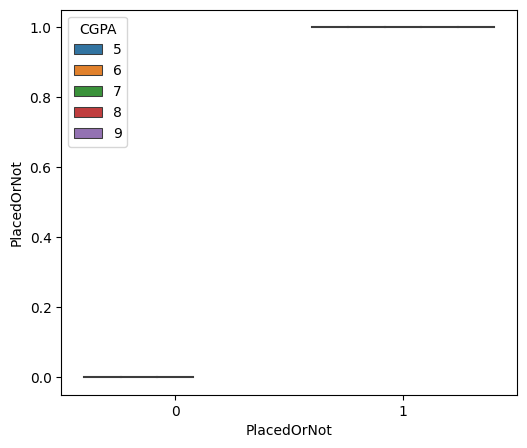

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(data=df, x='PlacedOrNot', y='PlacedOrNot', hue= 'CGPA')

<Axes: xlabel='PlacedOrNot', ylabel='PlacedOrNot'>

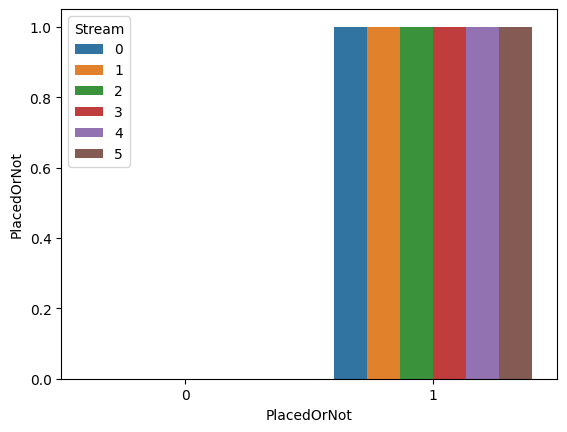

In [ ]:
sns.barplot(x=df.PlacedOrNot, y=df.PlacedOrNot, hue=df.Stream)


In [69]:
from sklearn.model_selection import train_test_split

In [ ]:
from numpy.random.mtrand import random
X_trale, X_test, Y_trale, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [70]:
print(X.shape, X_trale.shape, X_test.shape)


(2966, 7) (2372, 6) (594, 6)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_trale, Y_trale)

SVC(kernel='linear')

In [71]:
X_train_prediction = classifier.predict(X_trale)
training_data_accuracy = accuracy_score(X_train_prediction, Y_trale)

print('Accuracy score of the training data :', training_data_accuracy)


ValueError: ignored

In [ ]:
best_k = {"Regular":0} 
best_score = {"Regular":0}
for k in range(3, 50, 2):

    ## Using Regular training set 
    knn_temp = KNeighborsClassifier(n_neighbors=k)            # Instrantiate the model
    knn_temp.fit(X_trale, Y_trale)                            # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(X_test)                  # Predict on the test set
    score = metrics.accuracy_score (Y_test, knn_temp_pred)    # Get accuracy
    if score >= best_score["Regular"] and score < 100:        # Store best params
      best_score["Regular"] = score
      best_k["Regular"] = k


print("---Results---\nk: {}\nScore: {}".format(best_k, best_score))
## Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
## Fit the model to the training set
knn.fit(X_trale, Y_trale)
knn_pred = knn.predict(X_test) 
testd = accuracy_score(knn_pred, Y_test)

---Results---
k: {'Regular': 21}
Score: {'Regular': 0.877104377104377}


In [40]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [72]:
from keras.api._v2.keras import activations
classifier = Sequential()
classifier.add(keras.layers.Dense(6,activation = 'relu', input_dim=6))
classifier.add(keras.layers.Dropout (0.50))
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [43]:
loss_1 = tf. keras.losses.BinaryFocalCrossentropy()

classifier.compile(optimizer = 'Adam', loss = loss_1 , metrics = ['accuracy'])


In [48]:
classifier.fit(X_trale, Y_trale, batch_size = 20, epochs = 100)

ValueError: ignored

In [51]:
import pickle

pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl', 'rb'))

NameError: ignored